# Support Vector Machine
## Universidad Politecnica Salesiana
## Por: Alexander Siavichay

Disponible en:https://github.com/siavichay/SupportVectorMachine/blob/master/Practica_SVM.ipynb
    
A continuacion se presenta una implementacion simple de un modelo lineal con Support Vector Machine.
La data utilizada representa los resultados academicos de la Unidad Educativa Gabriel Arsenio Ullauri de la Ciudad de Cuenca-Ecuador del período 2018 y 2019

## Algoritmo SVM
El algoritmo presentado fué provisto, al cual se le hicieron unas leves modificaciones.

In [266]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')
%matplotlib inline

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        #self.colors = {1:'r',-1:'b'}
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(2,1,1)
            self.ax2 = self.fig.add_subplot(2,1,2)
            self.ax2.margins(x=-0.4, y=-0.4)
        
        #train
        
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}
        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]
        all_data = []
    
        for yi in self.data:
            for featureset in self.data[yi]:
                
                #print(featureset)
                for feature in featureset:
                    all_data.append(feature)
                #all_data.append(featureset)
        
        
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
       
        all_data = None
        # support_vectors yi=(xi.w+b) = 1
   
        step_sizes = ([ self.max_feature_value * 0.1, self.max_feature_value * 0.01, self.max_feature_value * 0.001 ])
        #step_sizes = ([ self.max_feature_value * 0.1, self.max_feature_value * 0.01 ])
        
        # extremely expensive
        b_range_multiple = 5
        # no necesitamos tomar un pequeño número de pasos
        # con b tal como hacemos w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            #Podemos hacer eso porque es un problema convexo
            optimized = False# este estaba en False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),self.max_feature_value*b_range_multiple,step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # es el link más débil en el SVM
                        # SMO intenta arreglar este bit
                        # restriccion yi(xi.x+b) >= 1
                        #
                        # add a break a partir de aqui
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                #print(xi,':',yi*(np.dot(w_t,xi)+b))
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]
                if w[0] < 0:
                    optimized = True
                    #print('Optimizado un paso')
                else:
                    w = w - step
                    
            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
        
        for i in self.data:
            for xi in self.data[i]: 
                yi=i
                #print(xi,':',yi*(np.dot(self.w,xi)+self.b))
                
    def prediccion(self,features):
        # sign( x.w+b)
        classification = np.sign(np.dot(np.array(features), self.w)+self.b)
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
            self.ax2.scatter(features[0], features[1], s=100, marker='*', c=self.colors[classification])
        return classification
    
    def visualize(self):
        [[self.ax.scatter(x[0],x[1], s=100, color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        [[self.ax2.scatter(x[0],x[1], s=50, color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        #hyperplane = x.w+b
        # v = w.x+b son las salidas que buscamos
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane(x,w,b,v):
            return(-w[0]*x-b+v) / w[1]
        
        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        # (w.x+b)=1
        # hiperplano de soporte vectorial positivo
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max],[psv1,psv2], 'k')
        self.ax2.plot([hyp_x_min, hyp_x_max],[psv1,psv2], 'k')
        # (w.x+b)=-1
        # hiperplano de soporte vectorial negativo
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max],[nsv1,nsv2], 'k')
        self.ax2.plot([hyp_x_min, hyp_x_max],[nsv1,nsv2], 'k')
        # (w.x+b)=0
        # hiperplano de soporte vectorial positivo
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        
        self.ax.plot([hyp_x_min, hyp_x_max],[db1,db2],'y--')
        self.ax2.plot([hyp_x_min, hyp_x_max],[db1,db2],'y--')
        
        plt.show()
        



## Dataset
Para el entrenamiento se utilizo una data previamente tratada con dos posibles resultados, por un lado, el resultado academico de mujeres vs hombres de la Unidad Educativa. Se evitaron ubicar datos ambiguos, caso contrario el algoritmo desarrollado no genera buenos resultados, o termina desbordandose.
Los datos tomados están desordenados y corresponden al período 2018.


Luego en el Test se ingreso los datos academicos del año 2019, se correlacionó los resultados siendo los datos centrales los unicos con un margen de error mínimo.

In [256]:
data = np.loadtxt("ArsenioUllauri2018", delimiter=",",dtype="int") # Load in the data
test = np.loadtxt("ArsenioUllauri2019", delimiter=",",dtype="int") # Load in the data
#data = np.loadtxt("fourclass.csv", delimiter=";",dtype="int") # Load in the data

In [257]:
labels=data[:,2]
data=data[:,:-1]
test=test[:,:-1]


## Tratamiento de datos Train
El algoritmo SVM necesita conocer los datos binarios, por lo que se separa de manera previa aquellos que se encuentran con 1 en el label corresponde a los datos de estudiantes hombres para el caso contrario, estudiantes mujeres.

In [260]:
negativoTrain=np.zeros( (200, 2) )
positivoTrain=np.zeros( (200, 2) )
ii=0
jj=0
for i in range(len(labels)):
    if labels[i]==1:
        
        positivoTrain[ii][0]=data[i][0]
        positivoTrain[ii][1]=data[i][1]
        ii=ii+1
        
    else:

        negativoTrain[jj][0]=data[i][0]
        negativoTrain[jj][1]=data[i][1]
        jj=jj+1

## EJECUCION
En el codigo siguiente primeramente se llama a la clase Support_Vector_Machine, con ello se entrena los datos, tomando solo 40 de ellos.
En el caso de Train se utilzó los 190 resultados del año 2019.
El color rojo en el grafico representa los resultados academicos de las mujeres, y los azules de los varones.
Las estrellas son las predicciones.

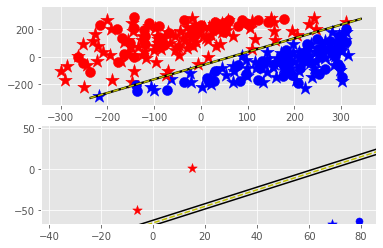

In [267]:
negativo=negativoTrain[1:40:]
#print(positivo)
positivo=positivoTrain[1:40:]
data_dict = {-1:negativo,1:positivo}
#print(data_dict)
svm = Support_Vector_Machine()
svm.fit(data = data_dict)
prediccion_us = test[1:190:]
for p in prediccion_us:
    svm.prediccion(p)
svm.visualize()


## Conclusiones
En el gráfico anterior se puede observar como el algoritmo SVM logra separar muy bien los datos de Test(Estrellas) provistos. El color rojo representa los resultaodazul representa 

El algoritmo necesita pulirse para trabajar con datos mas complejos.